In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import EnvParams, JaywalkEnv


easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [3]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [4]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

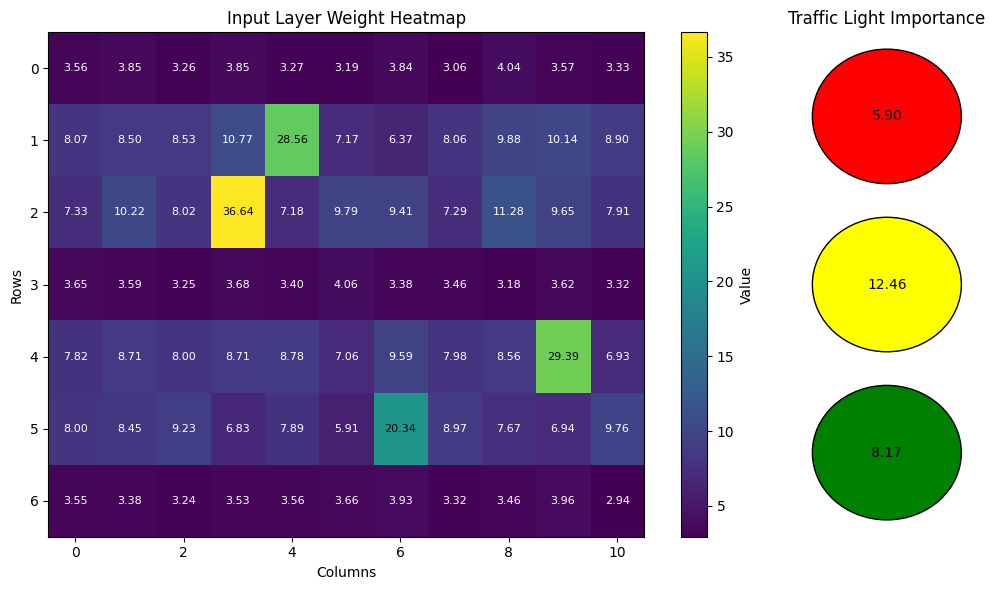

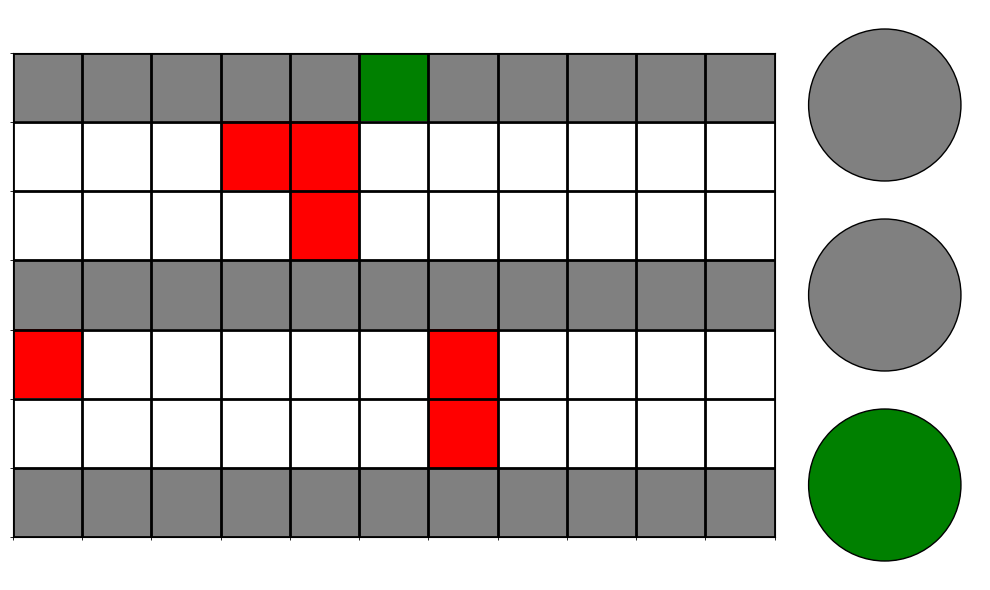

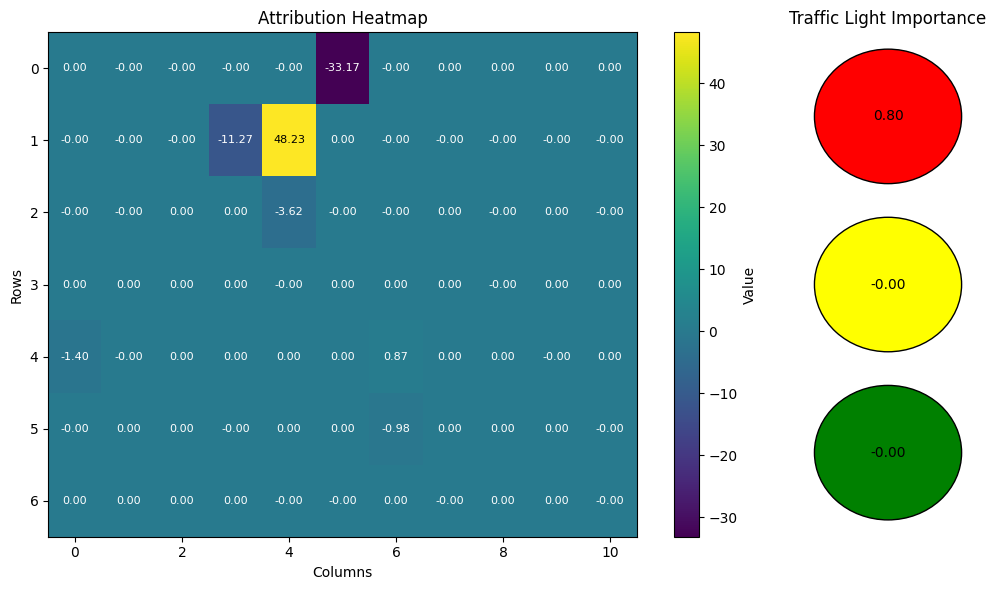

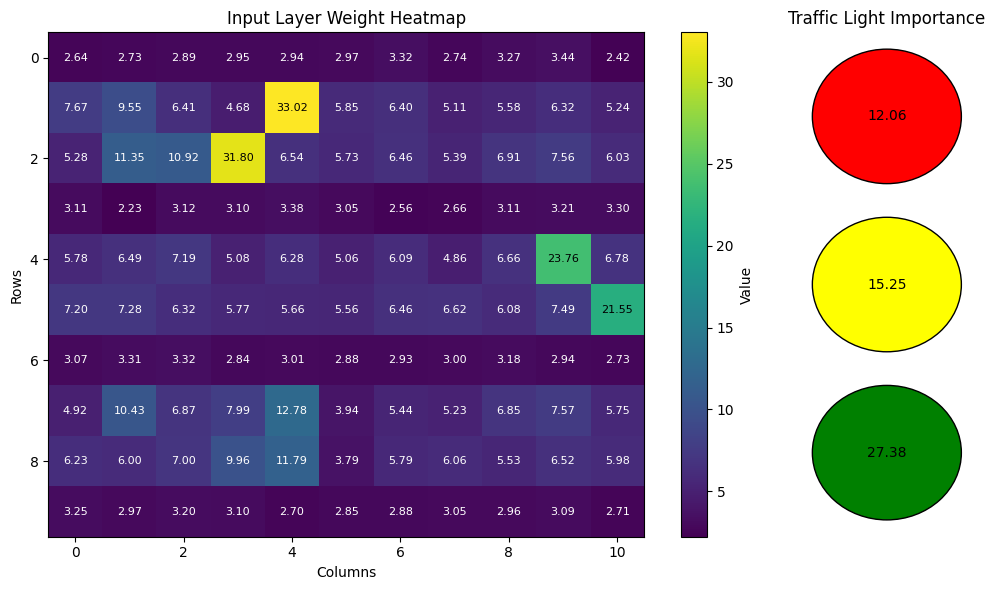

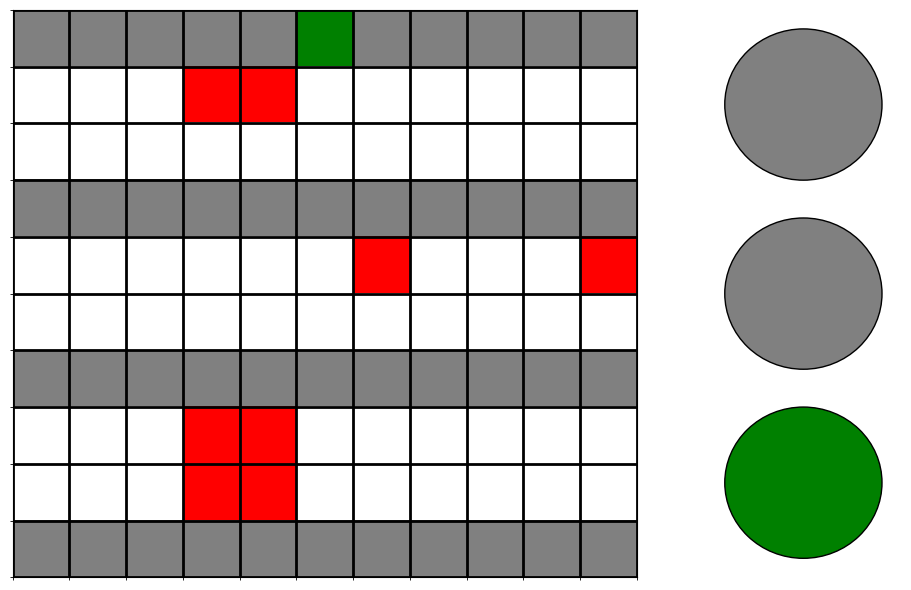

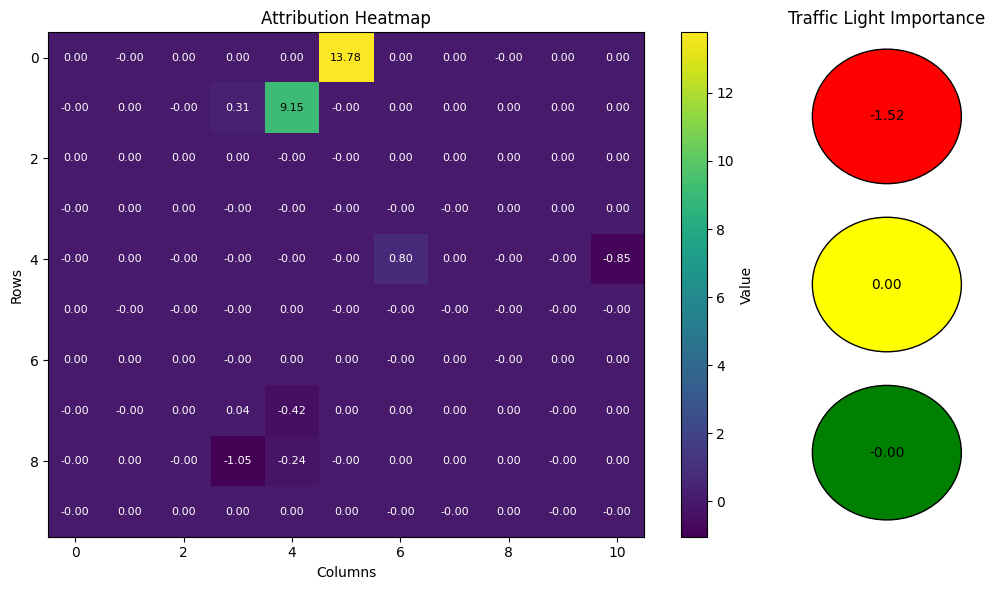

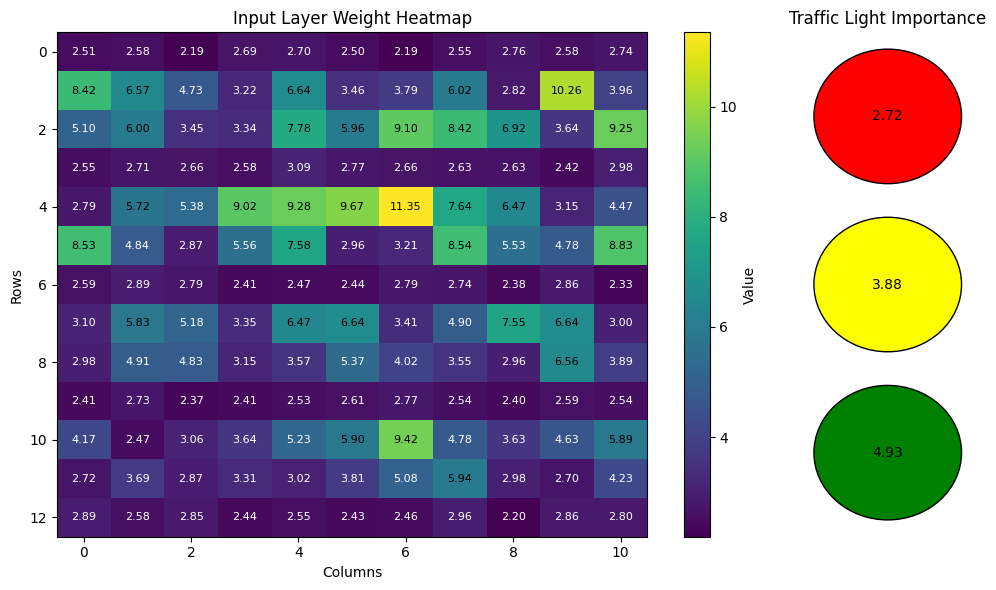

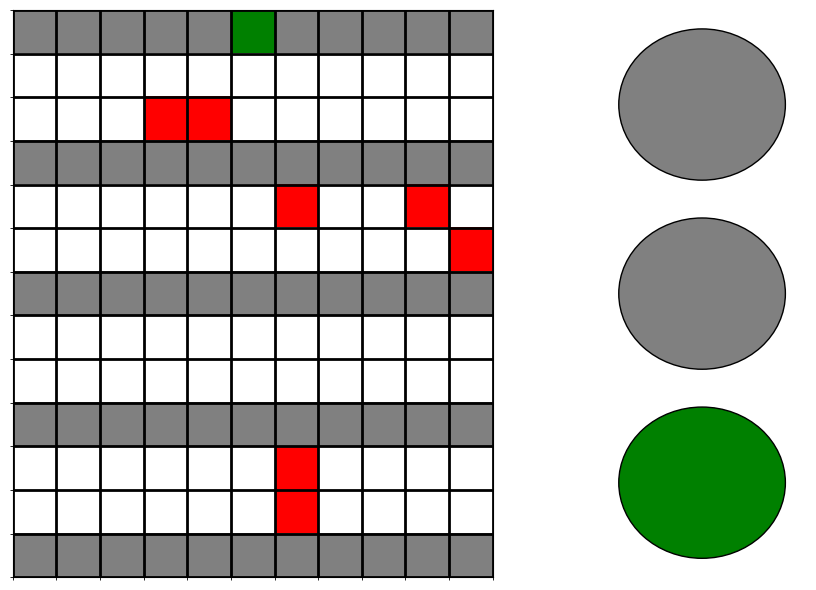

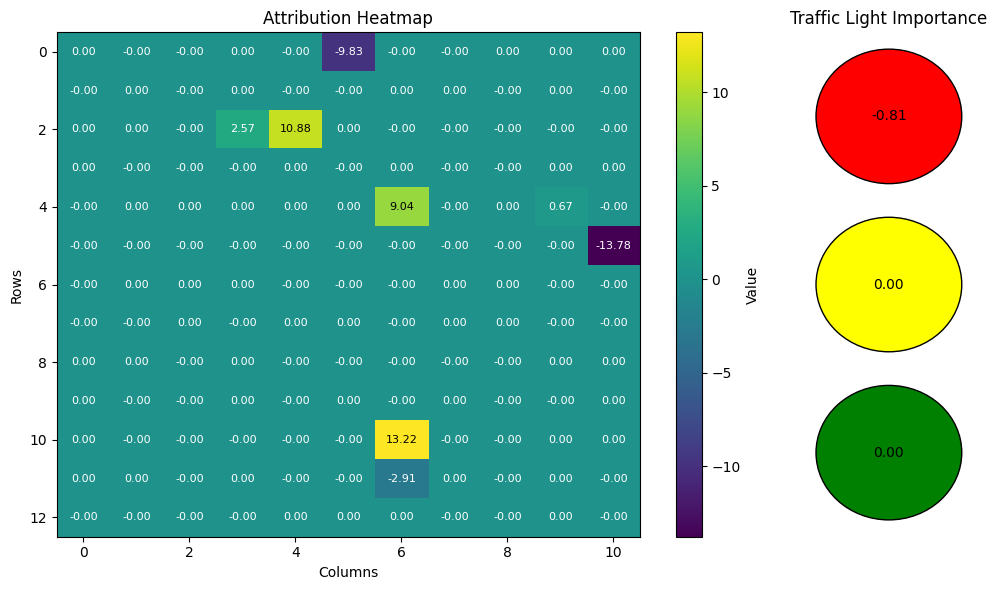

In [ ]:
from src.interpretability import plot_input_layer_weights, plot_weight_attribution
import torch
from src.agents.ppo.ppo_agent import PPOAgent

for env_type, env in zip(["easy", "medium", "hard"], [easy_env, medium_env, hard_env]):
    print(f"Evaluating {env_type}")
    train_parameters = {
        "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
        "action_dim": 3,
        "action_space": [0, 1, 2],
        "num_layers": 3,
        "hidden_dim": 64,
        "gamma": 0.99,
        "total_training_time_step": 1_000_000,
        "batch_size": 64,
        "learning_rate": 3e-5,
        "device": "cpu",
        "clip": 0.2,
        "epochs_per_iteration": 64,
        "timeout": 200,
    }

    agent = PPOAgent(env, train_parameters)
    agent.load(f"../../checkpoints/final_ppo_fixed/{env_type}")

    plot_input_layer_weights(agent.actor, env.grid_shape[0], env.grid_shape[1])

    state, _ = env.reset()
    state_tensor = torch.tensor(agent.transform_state(state)).float().view(1, -1)
    env.render(mode="human")
    plot_weight_attribution(
        agent.actor, state_tensor, rows=env.grid_shape[0], cols=env.grid_shape[1]
    )